# Assignment 2

In [135]:
import math
from csv import reader
import random
from math import sqrt
import matplotlib.pyplot as plt
import operator

In [136]:
def preprocess(file_address):
    transfer_tag = {
        'Iris-setosa':0,
        'Iris-versicolor':1,
        'Iris-virginica':2
    }
    tmpset = list()
    with open(file_address, 'r') as file:
        data_reader = reader(file)
        for row in data_reader:
            if not row:
                continue
            for i in range(len(row)-1):
                row[i] = float(row[i])
            row[-1] = transfer_tag[row[-1]]
            tmpset.append(row)
    dataset = tmpset
    return dataset

In [137]:
dataset = preprocess('./iris.data')
print(len(dataset))
print(dataset[0:5])

150
[[5.1, 3.5, 1.4, 0.2, 0], [4.9, 3.0, 1.4, 0.2, 0], [4.7, 3.2, 1.3, 0.2, 0], [4.6, 3.1, 1.5, 0.2, 0], [5.0, 3.6, 1.4, 0.2, 0]]


## Divide the dataset as development and test.

In [138]:
def split_devset_testset(dataset, split):
    dev_set = list()
    test_set = list()
    for index in range(len(dataset) - 1):
        if random.uniform(0, 1) < split:
            dev_set.append(dataset[index])
        else:
            test_set.append(dataset[index])
    return dev_set, test_set

In [139]:
dev_set, test_set = split_devset_testset(dataset, 0.7)
print("dev_set length:", len(dev_set), "--- test_set length:", len(test_set))


dev_set length: 106 --- test_set length: 43


## Distance metric.

In [157]:
def distance_metric(sample0, sample1, method, n = 4):
    
    # euclidean distance.
    if method == 0:
        ret_dist = 0
        for i in range(n):
            ret_dist += pow((sample0[i] - sample1[i]), 2)
        return math.sqrt(ret_dist)
    
    # normalized euclidean distance.
    elif method == 1:
        ret_sum = 0
        for i in range(n):
            avg = (sample0[i]-sample1[i])/2
            cal = sqrt(pow((sample0[i] - avg), 2) + pow((sample1[i] - avg), 2))
            ret_sum += pow(((sample0[i] - sample1[i]) / cal), 2)
        return math.sqrt(ret_sum)
    
    # cosine similarity.
    elif method == 2:
        molecule = 0
        denom_x = 0
        denom_y = 0
        ret_cal = 0

        for i in range(n):
            molecule += sample0[i] * sample1[i]
            denom_x += pow(sample0[i], 2)
            denom_y += pow(sample1[i], 2)
        ret_cal = -molecule / (sqrt(denom_x) * sqrt(denom_y))
        return ret_cal
    

In [141]:
def cal_accuracy(test_set, pred):
    correct = 0
    for x in range(len(test_set)):
        if test_set[x][-1] == pred[x]:
            correct += 1
    return (correct/float(len(test_set))) * 100

In [142]:
def pred_result(result):
    votes_list = {}
    for index, target in enumerate(result):
        if target[-1] in votes_list:
            votes_list[target[-1]] += 1
        else:
            votes_list[target[-1]] = 1
    ret_votes = max(votes_list.items(), key=lambda x: x[1])[0]

    return ret_votes


## Implement KNN.

In [143]:
def knn_func(train_set, k = 1, dist_cata = 0):
    label_num = []
    for index in train_set:
        dist_list = []
        for x in range(len(train_set)):
            dist = 0
            if train_set[x] == index:
                continue
            else:
                dist = distance_metric(index, train_set[x], dist_cata)
                dist_list.append((train_set[x], dist))
            dist_list.sort(key = operator.itemgetter(1))
        neighbors = [dist_list[i][0] for i in range(k)]

        label_num.append(pred_result(neighbors))
    accuracy = cal_accuracy(train_set, label_num)

    return accuracy

## Calculate Accuracy and Draw Charts.

In [144]:
dist_conve = {0: 'euclidean', 1: 'normalized euclidean', 2: 'cosine similarity'}
def run_all_func(dev_set):
    k = [1, 3, 5, 7]
    dist_list = [0, 1, 2]
    
    for x in k:
        for y in dist_list:
            acc = knn_func(dev_set, x, y)
            print('k =  %d, distance = %s, accuracy = %f' %
                  (x, dist_conve[y], acc))

In [145]:
run_all_func(dev_set)


k =  1, distance = euclidean, accuracy = 96.226415
k =  1, distance = normalized euclidean, accuracy = 96.226415
k =  1, distance = cosine similarity, accuracy = 95.283019
k =  3, distance = euclidean, accuracy = 96.226415
k =  3, distance = normalized euclidean, accuracy = 95.283019
k =  3, distance = cosine similarity, accuracy = 96.226415
k =  5, distance = euclidean, accuracy = 96.226415
k =  5, distance = normalized euclidean, accuracy = 95.283019
k =  5, distance = cosine similarity, accuracy = 97.169811
k =  7, distance = euclidean, accuracy = 96.226415
k =  7, distance = normalized euclidean, accuracy = 95.283019
k =  7, distance = cosine similarity, accuracy = 97.169811


In [146]:
best_k = 0
best_method = 0
best_acc = 0
acc_list = []
k_list = range(1, 20, 1)

## euclidean distance

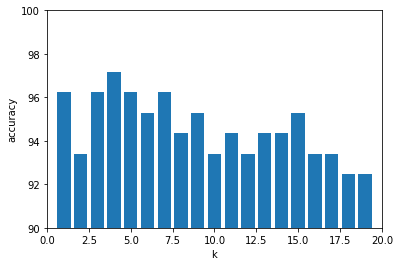

In [147]:
for k in k_list:
    acc = knn_func(dev_set, k, 0)
    acc_list.append(acc)
    if acc > best_acc:
        best_k, best_method, best_acc = k, 0, acc
plt.xlim(0, 20)
plt.ylim(90, 100)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.bar(k_list, acc_list)
plt.show()

## normalized euclidean distance.

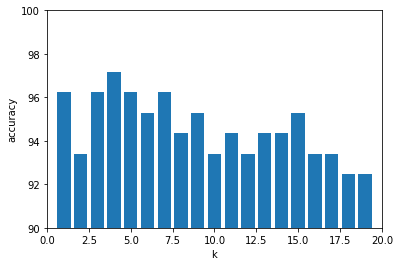

In [156]:
acc_list1 = []
for k in k_list:
    acc = knn_func(dev_set, k, 1)
    acc_list1.append(acc)
    if acc > best_acc:
        best_k, best_method, best_acc = k, 1, acc
plt.xlim(0, 20)
plt.ylim(90, 100)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.bar(k_list, acc_list)
plt.show()

## cosine similarity.

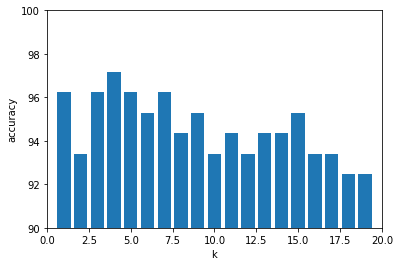

In [149]:
acc_list2 = []
for k in k_list:
    acc = knn_func(dev_set, k, 2)
    acc_list2.append(acc)
    if acc > best_acc:
        best_k, best_method, best_acc = k, 2, acc

plt.xlim(0, 20)
plt.ylim(90, 100)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.bar(k_list, acc_list)
plt.show()

In [150]:
print('max_k = %d, max_method = %s, max_acc = %f'%
                  (best_k, dist_conve[best_method], best_acc))


max_k = 9, max_method = cosine similarity, max_acc = 98.113208


## Using the test dataset.

In [151]:
best_acc = knn_func(test_set, best_k, best_method)
print("best accuracy:", best_acc)


best accuracy: 95.34883720930233
